## Data Exploration
Distribution shift is often a factor contributing to the generalization gap observed in our research.

**Distribution Shift**: If the distribution of the test data differs significantly from the training data, the model may not generalize well.

In this notebook, we will conduct an brief exploration of the data distributions across our datasets. Our primary objectives are:

1. To analyze the characteristics and patterns within Data1 and Data3.
2. To investigate why the model trained on Data1 (model1) shows poor generalization performance when applied to Data3.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data1

In [2]:
# Read dataset information

df_data1 = pd.read_csv('./Data1.csv')
df_data1

FileNotFoundError: [Errno 2] No such file or directory: './Data1.csv'

The dataset is provided in CSV format with the following key columns:

| Column Name | Description | Data Type |
|-------------|-------------|-----------|
| `AccessionNumber_anon` | Anonymized study identifier | String |
| `empi_anon` | Anonymized patient identifier | String |
| `Path` | Relative path to the image file | String |
| `Sex` | Patient's sex | Categorical |
| `Race` | Patient's race | Categorical |
| `Age` | Patient's age | Numeric |
| `ImageView_Frontal` | Indicates if the image is a frontal view | Binary (1: Yes, 0: No) |


The dataset includes the following binary label columns:

| Label | Description | Values |
|-------|-------------|--------|
| `Pneumothorax` | Presence of pneumothorax | 1: Present, 0: Absent |
| `No Finding` | No abnormalities detected | 1: Yes, 0: No |
| `Support Devices` | Presence of medical support devices | 1: Present, 0: Absent |

**Note:** The presence of support devices is not considered a clinical finding.

In [3]:
def count_categorical_values(df):
    categorical_columns = df.columns
    
    # Create a dictionary comprehension
    # For each column, count the occurrences of each unique value
    return {col: df[col].value_counts() for col in categorical_columns}

def plot_chest_xray_data(data, title):
    """
    Create a plot of chest X-ray data.
    
    Parameters:
    data (dict): A dictionary containing the chest X-ray data categories and their counts.
    
    Returns:
    fig (Figure): The matplotlib Figure object containing the plots.
    """
    # Create subplots
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle(f'{title}', fontsize=16)

    # Flatten the axes array for easier iteration
    axs = axs.flatten()

    # Plot each category
    for i, (category, values) in enumerate(data.items()):
        df = pd.Series(values)
        df.plot(kind='bar', ax=axs[i], title=category)
        axs[i].set_ylabel('Count')
        axs[i].set_ylim(0, 1200)  # Set y-axis limit
        
        # Add value labels on top of each bar
        for j, v in enumerate(df):
            axs[i].text(j, v, str(v), ha='center', va='bottom')

    # Remove the extra subplot
    axs[-1].remove()

    # Adjust the layout
    plt.tight_layout()
    
    return fig

def plot_age_distribution(df, age_column, title, bins=20, figsize=(12, 7)):
    """
    Create a histogram showing the distribution of age, including mean and standard deviation.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame containing the age data.
    age_column (str): The name of the column in the DataFrame that contains age data.
    bins (int): The number of bins for the histogram (default is 20).
    figsize (tuple): The size of the figure in inches (default is (12, 7)).
    
    Returns:
    fig (Figure): The matplotlib Figure object containing the histogram.
    """
    # Calculate mean and standard deviation
    mean_age = df[age_column].mean()
    std_age = df[age_column].std()
    
    # Create the figure and axis
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot the histogram using seaborn (which uses matplotlib under the hood)
    sns.histplot(data=df, x=age_column, bins=bins, kde=True, ax=ax)
    
    # Add vertical lines for mean and ±1 standard deviation
    ax.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age:.2f}')
    ax.axvline(mean_age + std_age, color='green', linestyle='dashed', linewidth=2, label=f'Mean + SD: {mean_age + std_age:.2f}')
    ax.axvline(mean_age - std_age, color='green', linestyle='dashed', linewidth=2, label=f'Mean - SD: {mean_age - std_age:.2f}')
    
    # Customize the plot
    ax.set_title(f'Distribution of {age_column} in {title}', fontsize=16)
    ax.set_xlabel(age_column, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    
    # Add text annotation for mean and standard deviation
    stats_text = f'Mean: {mean_age:.2f}\nSD: {std_age:.2f}'
    ax.text(0.95, 0.95, stats_text, transform=ax.transAxes, verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Add grid lines for better readability
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Add legend
    ax.legend(loc='upper left')
    
    # Tight layout to prevent clipping of labels
    plt.tight_layout()
    
    return fig

Count the values in the categorical variables:

In [4]:
dict_data1 = count_categorical_values(df_data1[['Sex','Race','Pneumothorax','Support Devices','No Finding']])
dict_data1

{'Sex': Sex
 F    1128
 M    1128
 Name: count, dtype: int64,
 'Race': Race
 Black    1128
 White    1128
 Name: count, dtype: int64,
 'Pneumothorax': Pneumothorax
 1.0    1128
 0.0    1128
 Name: count, dtype: int64,
 'Support Devices': Support Devices
 1.0    1128
 0.0    1128
 Name: count, dtype: int64,
 'No Finding': No Finding
 0.0    1128
 1.0    1128
 Name: count, dtype: int64}

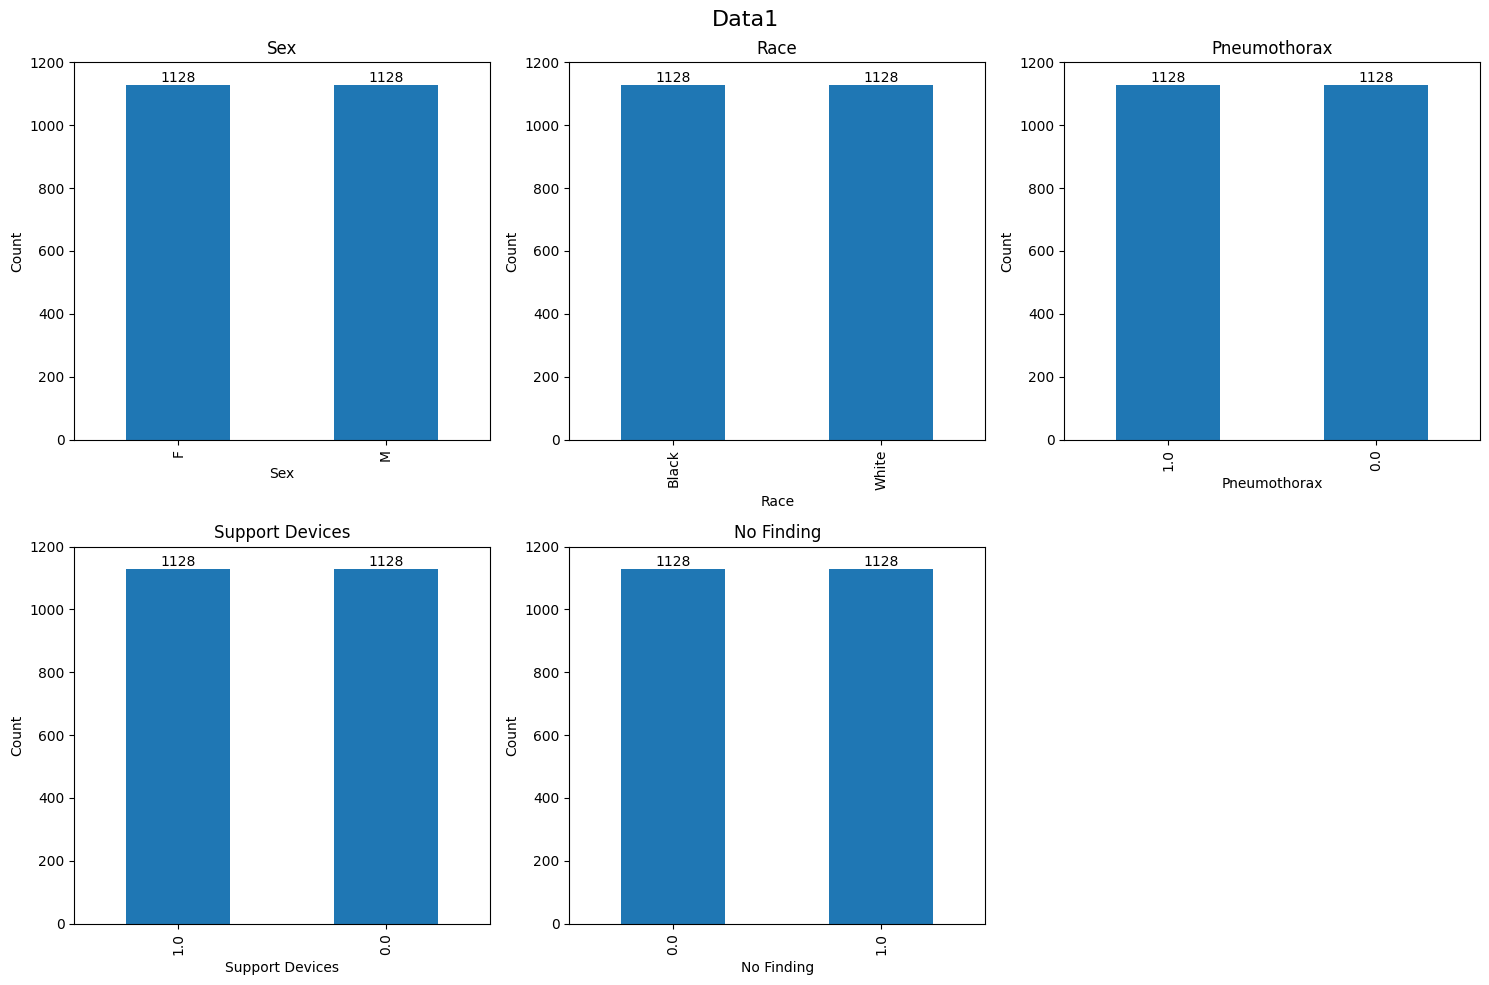

In [5]:
fig1 = plot_chest_xray_data(dict_data1, 'Data1')
plt.show()

plot the histogram of the continuous variable:

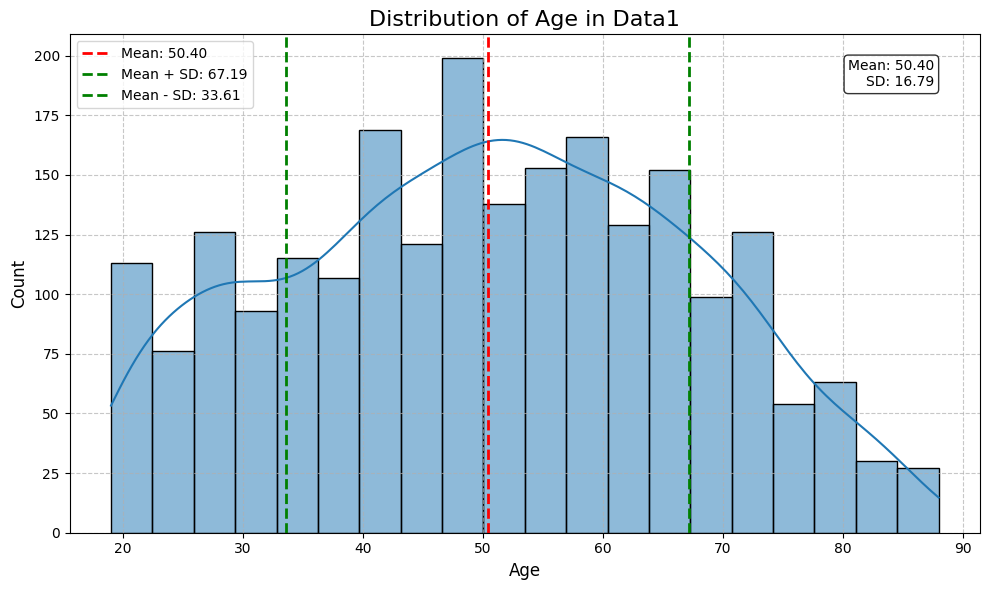

In [6]:
age_fig1 = plot_age_distribution(df_data1, 'Age', 'Data1', bins=20, figsize=(10, 6))
plt.show()

We observed balanced distributions for `Sex`, `Race`, `Pneumothorax`, `Support Devices`, and `No Finding`!

### Data3

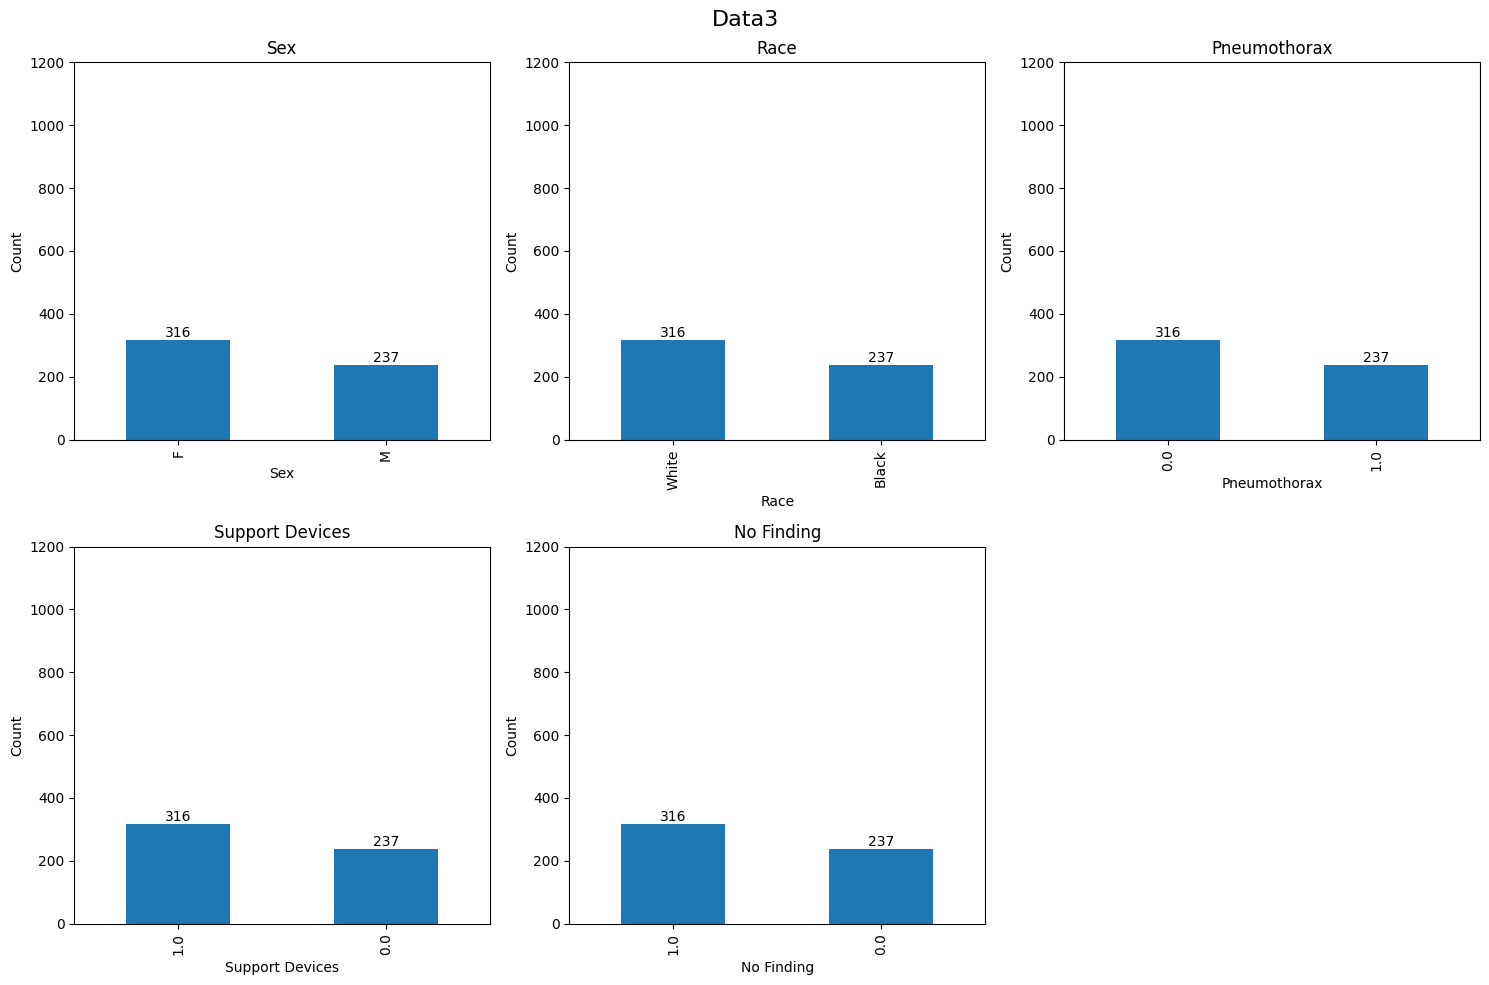

In [7]:
df_data3 = pd.read_csv('./Data3.csv')
dict_data3 = count_categorical_values(df_data3[['Sex','Race','Pneumothorax','Support Devices','No Finding']])
fig3 = plot_chest_xray_data(dict_data3, 'Data3')
plt.show()

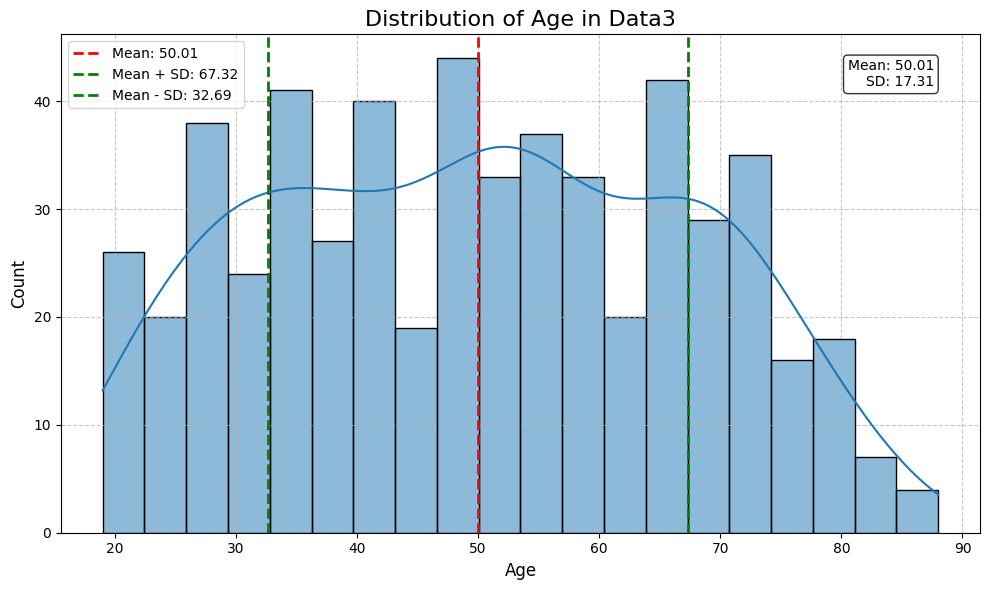

In [8]:
age_fig3 = plot_age_distribution(df_data3, 'Age', 'Data3', bins=20, figsize=(10, 6))
plt.show()

#### ❓Question: What is the difference between Data1 and Data3?

### Label Correlation

**The labels are not independent!!** Check co-occurrence matrix of the findings. 

This matrix provides valuable insights into the relationships and patterns between different abnormalities or diseases that may appear together in CXR images.

In [9]:
PATHOLOGIES = ['Pneumothorax', 'Support Devices', 'No Finding']

def cooccurrence(df):
    # Initialize a 14x14 matrix to store the co-occurrence ratios
    num_conditions = len(PATHOLOGIES)
    co_occurrence_matrix = np.zeros((num_conditions, num_conditions))

    # Calculate the co-occurrence ratios
    for i, row_condition in enumerate(PATHOLOGIES):
        row_condition_count = df[df[row_condition] == 1].shape[0]
        
        # Skip if the row condition count is zero to avoid division by zero
        if row_condition_count == 0:
            continue
        
        for j, col_condition in enumerate(PATHOLOGIES):
            co_occurrence_count = df[(df[row_condition] == 1) & (df[col_condition] == 1)].shape[0]
            co_occurrence_ratio = co_occurrence_count / row_condition_count
            co_occurrence_matrix[i, j] = co_occurrence_ratio

    return pd.DataFrame(co_occurrence_matrix, columns=PATHOLOGIES, index=PATHOLOGIES)

def plot_heatmap(co_occurrence_matrix, title):
    # Create a heatmap using seaborn
    plt.figure(figsize=(6, 5))
    sns.heatmap(co_occurrence_matrix, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title(f"Normalized Co-occurrence of Conditions ({title})")
    #plt.savefig('Emory_matrix.png', bbox_inches='tight')
    plt.show()

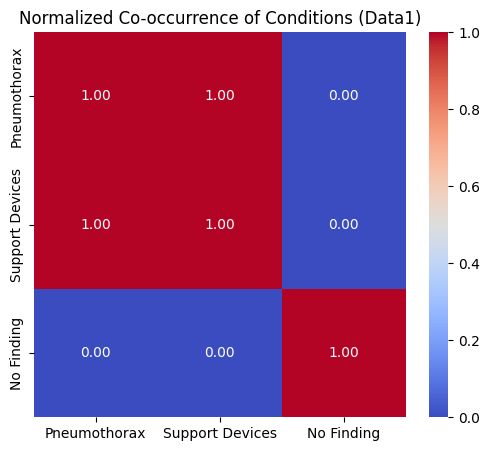

In [10]:
cooccur1 = cooccurrence(df_data1)
plot_heatmap(cooccur1, 'Data1')

Here's how to read and interpret the co-occurrence matrix:

1. Matrix Structure:

- Each row and column represents a pathology.
- The value at position [i, j] represents the probability of pathology j occurring given that pathology i is present.


2. Interpretation of Values:

- Values range from 0 to 1 (or 0% to 100% if you prefer to think in percentages).
- A value of 0 means the column pathology never occurs when the row pathology is present.
- A value of 1 means the column pathology always occurs when the row pathology is present.


3. Diagonal Values:

- The diagonal of the matrix (where row and column pathologies are the same) will always be 1 (or very close to 1 due to floating-point arithmetic).
- This is because a pathology always co-occurs with itself.


4. Asymmetry:

- The matrix is not necessarily symmetric. The value at [i, j] may be different from [j, i].
- For example, if [Pneumonia, Edema] = 0.3 and [Edema, Pneumonia] = 0.5, this means:

- 30% of patients with Pneumonia also have Edema
- 50% of patients with Edema also have Pneumonia

We observed that all the pneumothorax cases have support devices and all the no finding cases have ***no*** support devices.

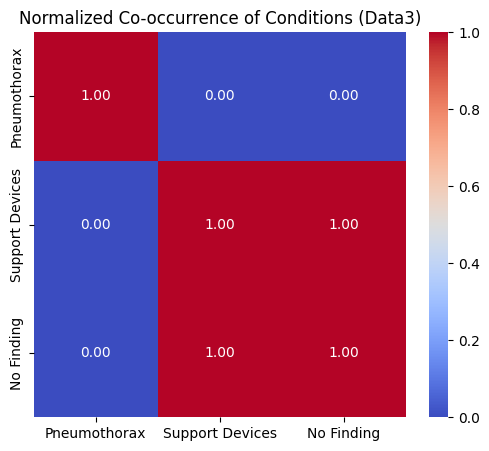

In [11]:
cooccur3 = cooccurrence(df_data3)
plot_heatmap(cooccur3, 'Data3')

We observed that all the pneumothorax cases have ***no*** support devices and all the no finding cases have support devices!

#### It is likely that Model1 is using `Support Devices` as a **shortcut** to predict the presence of `Pneumothorax`!

### Data2

We prepare another dataset (Data2) with different label correlation to train another model (model2).

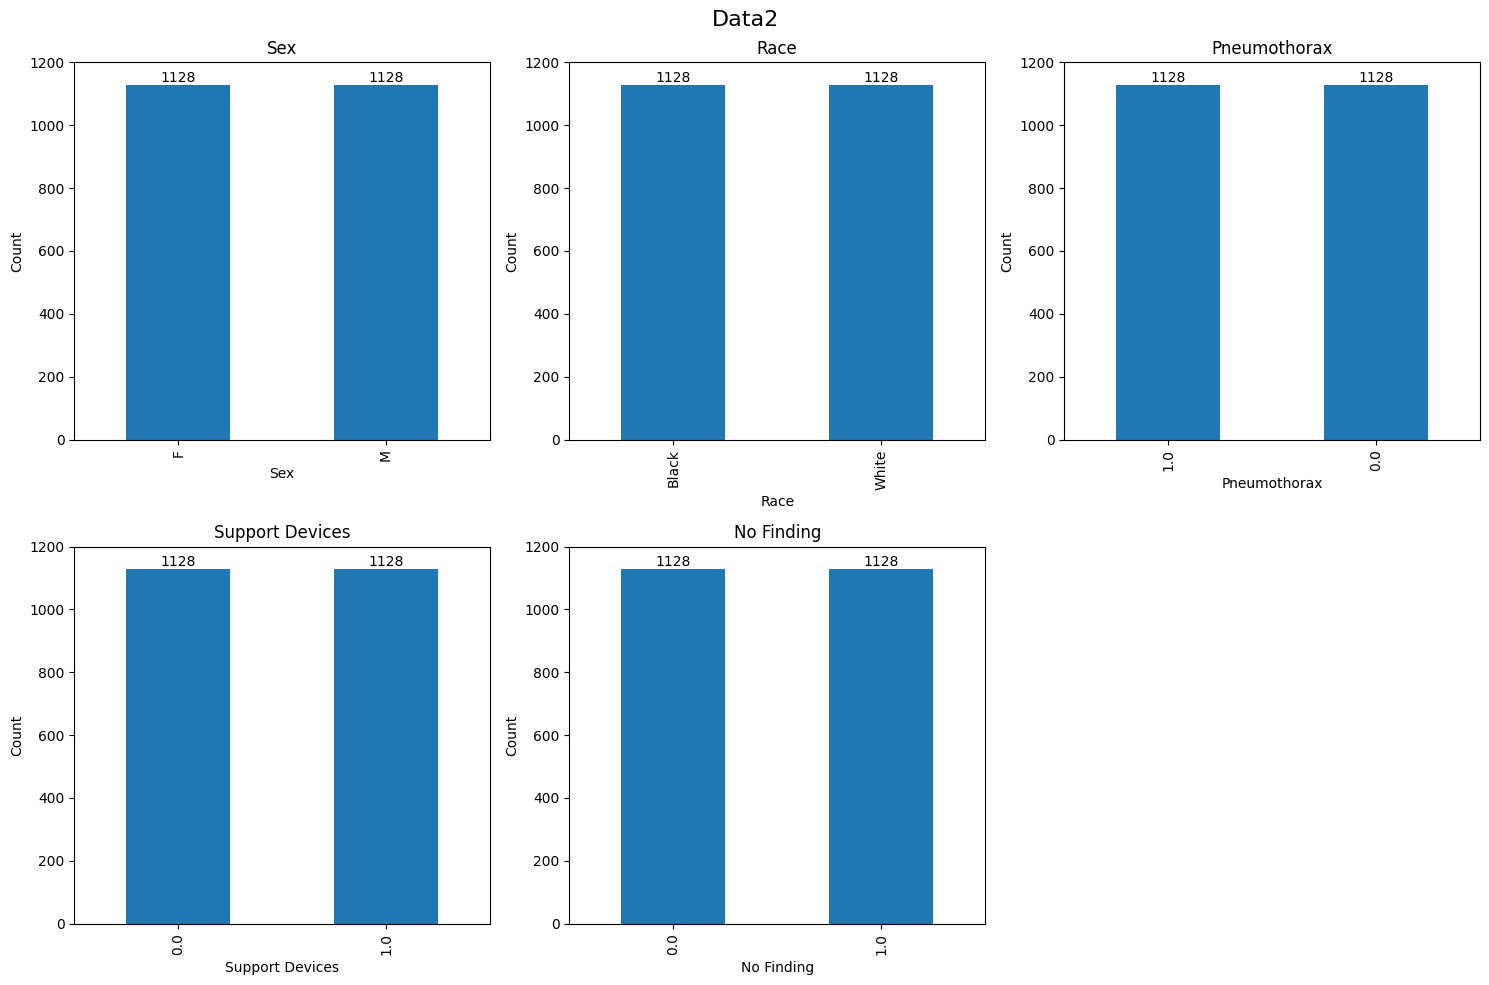

In [12]:
df_data2 = pd.read_csv('./Data2.csv')
dict_data2 = count_categorical_values(df_data2[['Sex','Race','Pneumothorax','Support Devices','No Finding']])
fig2 = plot_chest_xray_data(dict_data2, 'Data2')
plt.show()

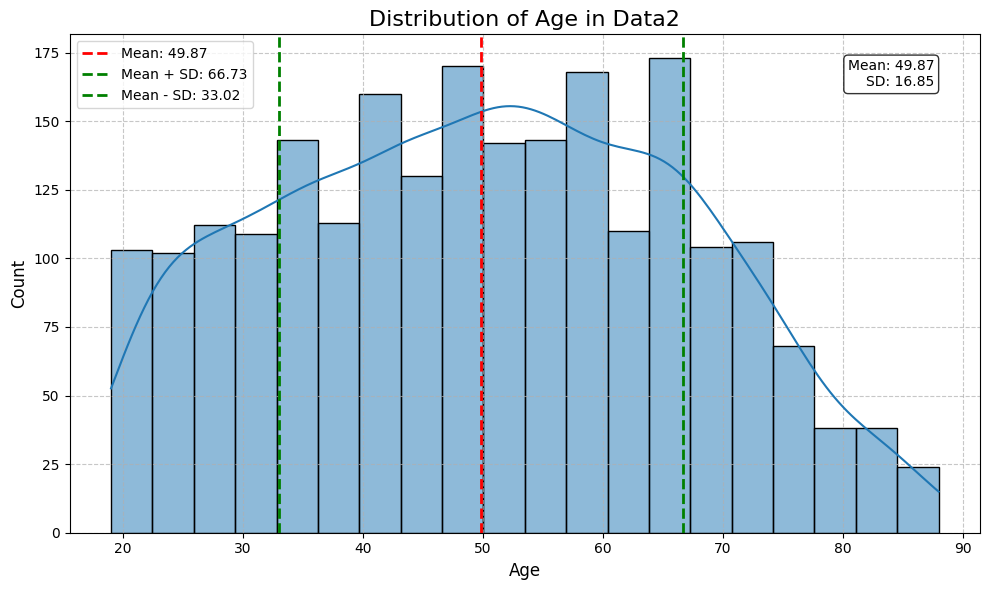

In [13]:
age_fig2 = plot_age_distribution(df_data2, 'Age', 'Data2', bins=20, figsize=(10, 6))
plt.show()

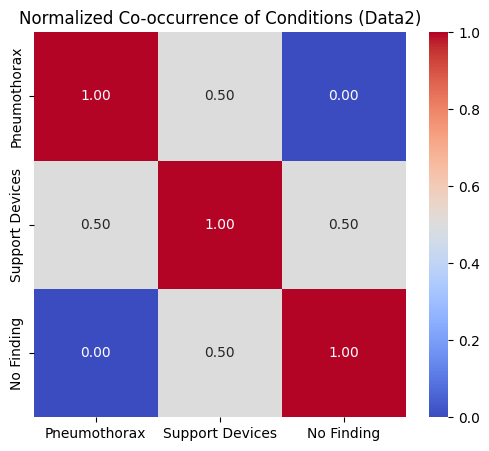

In [14]:
cooccur2 = cooccurrence(df_data2)
plot_heatmap(cooccur2, 'Data2')

We observed that half of the pneumothorax cases and half of the no finding cases have support devices.

In the next notebook, we are going to train a new model (model2) using Data2.